In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [75]:
iris = datasets.load_iris()

In [3]:
y = np.array(iris.target[0:100])
for i in range(50):
    y[i] = -1

In [4]:
X = iris.data[0:100, [0,2]]

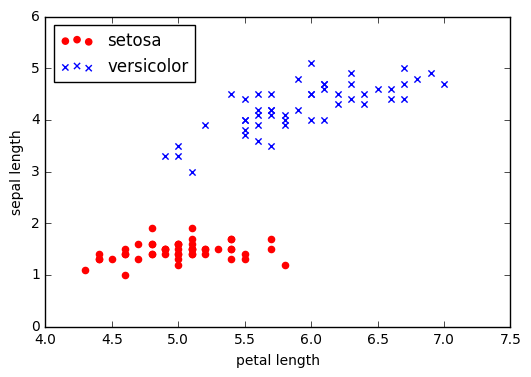

In [5]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [58]:
class Adaline(object):
    
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        self.cost_ = []
        self.w_ = None
    
    def fit(self, X, y):
        """
        :param X: {array-like}, shape = [n_samples, n_features]
        :param y: array-like, shape = [n_samples]
        :return:
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
    
        for _ in range(self.n_iter):
            output = self.predict(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if cost == 0:
                break
        return self
    
    def activation(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [13]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

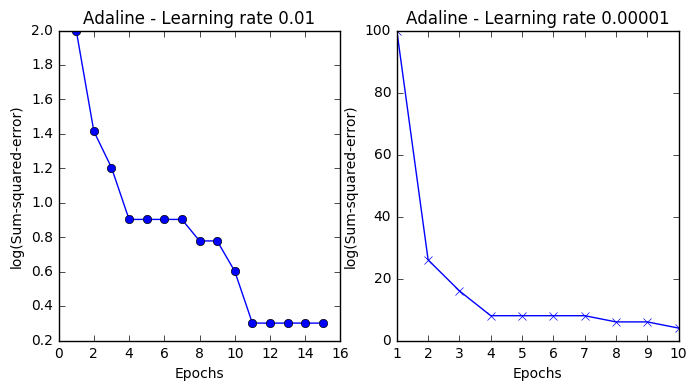

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = Adaline(n_iter=20, eta=0.01)
ada1.fit(X_std, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = Adaline(n_iter=10, eta=0.00001)
ada2.fit(X_std, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.00001')
plt.show()

In [45]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

0.0001


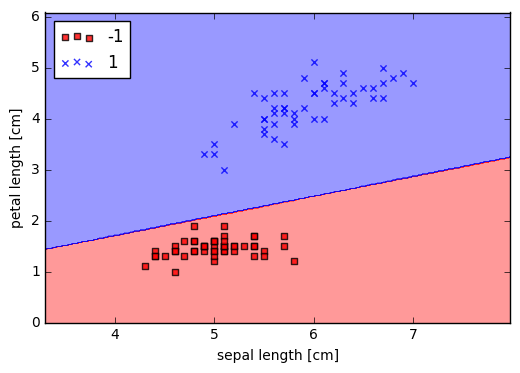

[100.0, 100.0, 100.0, 100.0, 100.0, 94.0, 100.0, 0.0]


In [69]:
ada = Adaline(n_iter=50, eta=0.0001)
print(ada.eta)
ada.fit(X, y)
plot_decision_regions(X, y, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
print(ada.cost_)